# Задания

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('../datasets/pizza.csv', sep = ';')

In [40]:
import re

In [41]:
r = r'(Mozzarella Cheese)'

In [42]:
obr = df['pizza_ingredients'].apply(lambda x: re.search(r, str(x).lower()))

In [43]:
itog = np.any(np.array([~obr.isnull()]), axis=0)

In [44]:
new_df = df[itog]

In [45]:
new_df.head(10)

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time


## Доверительные интервалы

In [10]:
## Код тут
df = pd.read_csv('../datasets/pizza.csv', sep = ';')
df.head(5)

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19
3,4,2,ital_supr_l,2015-01-01 00:00:00,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58
4,5,2,mexicana_m,2015-01-01 00:00:00,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24


In [11]:
#объединяем дату и время в одну колонку
df['order_datetime'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'])
df['order_datetime'].head(2)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_10972\1005584986.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_datetime'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'])


0   2015-01-01 11:38:36
1   2015-01-01 11:57:40
Name: order_datetime, dtype: datetime64[ns]

In [12]:
#оставляем только дату
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].head(165)

0     2015-01-01
1     2015-01-01
2     2015-01-01
3     2015-01-01
4     2015-01-01
         ...    
160   2015-01-01
161   2015-01-02
162   2015-01-02
163   2015-01-02
164   2015-01-02
Name: order_date, Length: 165, dtype: datetime64[ns]

In [13]:
#называем дни недели
df['day_of_week'] = df['order_date'].dt.day_name(locale='Russian')
df['day_of_week'].value_counts().sort_index()

day_of_week
Воскресенье    628
Вторник        702
Понедельник    634
Пятница        818
Среда          655
Суббота        706
Четверг        857
Name: count, dtype: int64

Text(0.5, 1.0, 'Диаграмма зависимости количества проданной пиццы от дня недели')

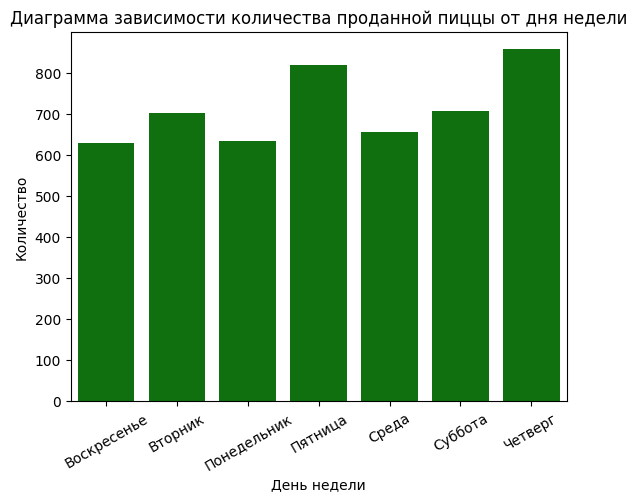

In [14]:
import seaborn as sns
sns.barplot(x = df['day_of_week'].value_counts().sort_index().index, y = df['day_of_week'].value_counts().sort_index().values, orient = 'v', color = "green")
plt.xlabel('День недели')
plt.xticks(rotation = 30)
plt.ylabel('Количество')
plt.title('Диаграмма зависимости количества проданной пиццы от дня недели')

In [15]:
maxz=max(df['day_of_week'].value_counts())
maxday=max(df['day_of_week'].value_counts().sort_index().index)
print("Больше всего пиццы (", maxz, "штук ) продано в", maxday)

Больше всего пиццы ( 857 штук ) продано в Четверг


In [16]:
minz=min(df['day_of_week'].value_counts())
minday=min(df['day_of_week'].value_counts().sort_index().index)
print("Меньше всего пиццы (", minz, "штук ) продано в", minday)

Меньше всего пиццы ( 628 штук ) продано в Воскресенье


In [17]:
df['lead_time'] = df["lead_time"].astype('datetime64[ns]')
df['cook_time'] = (df['lead_time'] - df['order_datetime']).dt.seconds

In [18]:
mean_time = round(df['cook_time'].mean())
median_time = round(df['cook_time'].median())
max_time = round(df['cook_time'].max())
min_time = round(df['cook_time'].min())

print("Cреднее время приготовления пиццы (c):", mean_time)
print("Mедианное время приготовления пиццы (c):", median_time)
print("Mаксимальное время приготовления пиццы (c):", max_time)
print("Mинимальное время приготовления пиццы (c):", min_time)

Cреднее время приготовления пиццы (c): 1007
Mедианное время приготовления пиццы (c): 1006
Mаксимальное время приготовления пиццы (c): 1609
Mинимальное время приготовления пиццы (c): 444


In [19]:
df['cook_time'].head(2)

0     894
1    1126
Name: cook_time, dtype: int32

In [20]:
std = np.std(df['cook_time'], ddof=1)
std

181.11166502542474

In [21]:
#  95% доверительный интервал x(+/-)z*(s/√n) 
#x : выборочное среднее
#z=1.8 значение, которое вы будете использовать, зависит от выбранного вами уровня достоверности
#s: стандартное отклонение выборки
#n: размер выборки
ci_upper = round(mean_time + 1.8 * std / np.sqrt(len(df['cook_time'])))
ci_lower = round(mean_time - 1.8 * std / np.sqrt(len(df['cook_time'])))
ci_lower, ci_upper

(1002, 1012)

In [22]:
#import scipy.stats as st
#st.norm.interval(alpha= 0.95 , loc=np.mean(df['cook_time']), scale=st.sem(df['cook_time']))

In [25]:
group = df.groupby(['pizza_name'])['cook_time'].agg(['mean','count', 'sem'])
group = group.loc[(group['count'] >= 100)]

group['ci95_hi'] = group['mean'] + 1.96* group['sem']
group['ci95_lo'] = group['mean'] - 1.96* group['sem']

group_max = group['ci95_hi']. idxmax ()
group_max

'The Italian Vegetables Pizza'

In [26]:
group['wide'] = group['ci95_hi'] - group['ci95_lo']
group_wide = group['wide'].idxmax ()
group_wide

'The Chicken Alfredo Pizza'

## AB тестирование

In [27]:
df = pd.read_csv('../datasets/click.csv', low_memory=False)
df.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [28]:
from statsmodels.stats.proportion import proportion_confint
conf_interval_banner_a = proportion_confint(sum(df.banner_a), 
                                            df.shape[0])
conf_interval_banner_b = proportion_confint(sum(df.banner_b), 
                                            df.shape[0])


In [33]:
conf_interval_banner_b[0]

0.03911451622486782

In [29]:
print(conf_interval_banner_a)
print(conf_interval_banner_b)

(0.02530064022092865, 0.04869935977907135)
(0.03911451622486782, 0.06688548377513218)


In [30]:
if max (conf_interval_banner_a[0], conf_interval_banner_b[0]) < min (conf_interval_banner_a[1], conf_interval_banner_b[1]):
    print ("Интервалы пересекаются")
else:
    print ("Интервалы не пересекаются")

Интервалы пересекаются


Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [71]:
import scipy.stats
import math
len_a_1 = len(df[df['banner_a']==1])
len_a_0 = len(df[df['banner_a']==0])
len_b_1 = len(df[df['banner_b']==1])
len_b_0 =len(df[df['banner_b']==0])

p_a = len_a_1 / len(df['banner_a'])
p_b = len_b_1 / len(df['banner_b'])
n_a = len(df['banner_a'])
n_b = len(df['banner_b'])

z =  scipy.stats.norm.ppf(1 - 0.05 / 2)
sqrt = math.sqrt ((p_a * (1- p_a) / n_a) + (p_b * (1-p_b) / n_b))

result = [p_a - p_b + (z * sqrt), p_a -p_b - (z * sqrt)]
print ('95% доверительный интервал для разности двух долей:' , result )

95% доверительный интервал для разности двух долей: [0.002157138511054299, -0.0341571385110543]


Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем 

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [34]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [35]:
z = z_stat(df.banner_a, df.banner_b)
p_value = 0.05

if z < p_value:
    print("Нулевая гипотеза отвергается. Новый баннер лучше.")
else:
    print("Нулева гипотеза не отвергается. Старый баннер лучше")

Нулевая гипотеза отвергается. Новый баннер лучше.


In [36]:
z

-1.7258261378415294

## Корреляции

In [74]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

In [75]:
from scipy.stats import pearsonr, spearmanr

# Коэффициент корреляции Пирсона и Спирмена для x~y1
corr_pearson_y1, _ = pearsonr(x, y1)
corr_spearman_y1, _ = spearmanr(x, y1)

# Коэффициент корреляции Пирсона и Спирмена для x~y2
corr_pearson_y2, _ = pearsonr(x, y2)
corr_spearman_y2, _ = spearmanr(x, y2)

# Коэффициент корреляции Пирсона и Спирмена для x~y3
corr_pearson_y3, _ = pearsonr(x, y3)
corr_spearman_y3, _ = spearmanr(x, y3)

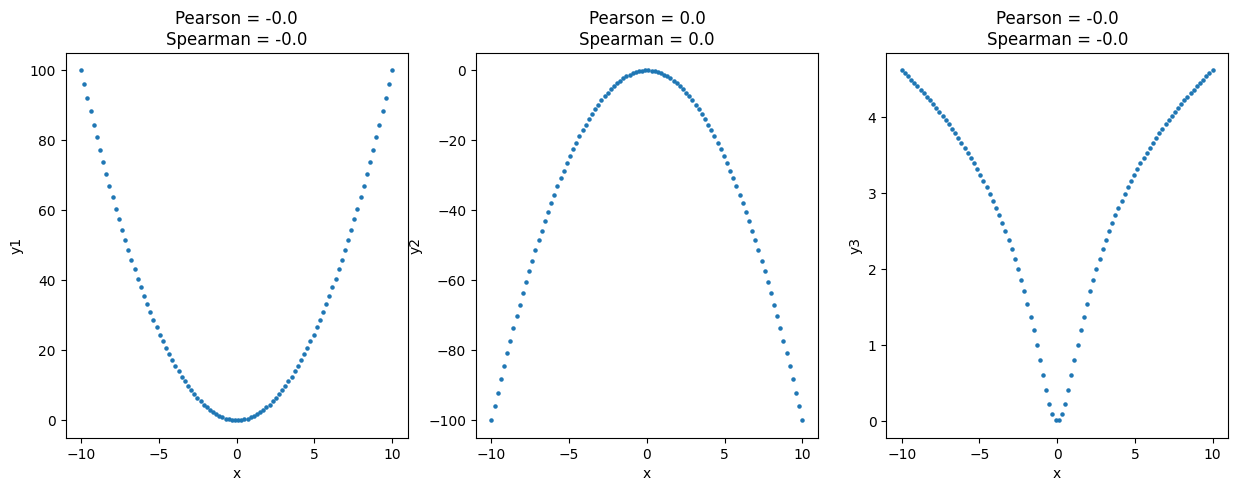

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(x, y1, s=5)
axes[0].set_title('Pearson = {}\nSpearman = {}'.format(round(corr_pearson_y1, 2), round(corr_spearman_y1, 2)))
axes[0].set_xlabel('x')
axes[0].set_ylabel('y1')

axes[1].scatter(x, y2, s=5)
axes[1].set_title('Pearson = {}\nSpearman = {}'.format(round(corr_pearson_y2, 2), round(corr_spearman_y2, 2)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('y2')

axes[2].scatter(x, y3, s=5)
axes[2].set_title('Pearson = {}\nSpearman = {}'.format(round(corr_pearson_y3, 2), round(corr_spearman_y3, 2)))
axes[2].set_xlabel('x')
axes[2].set_ylabel('y3')

plt.show()

In [77]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

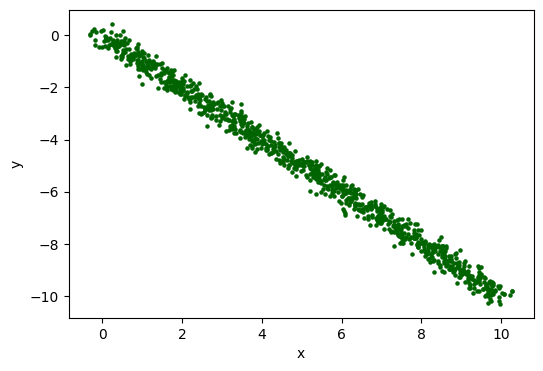

In [78]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=5, color="#006400")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [79]:
indices = np.random.choice(range(len(x)), size=4, replace=False)
x[indices] = [25, 50, 150, 650]
y[indices] = [20, 40, 60, 80]

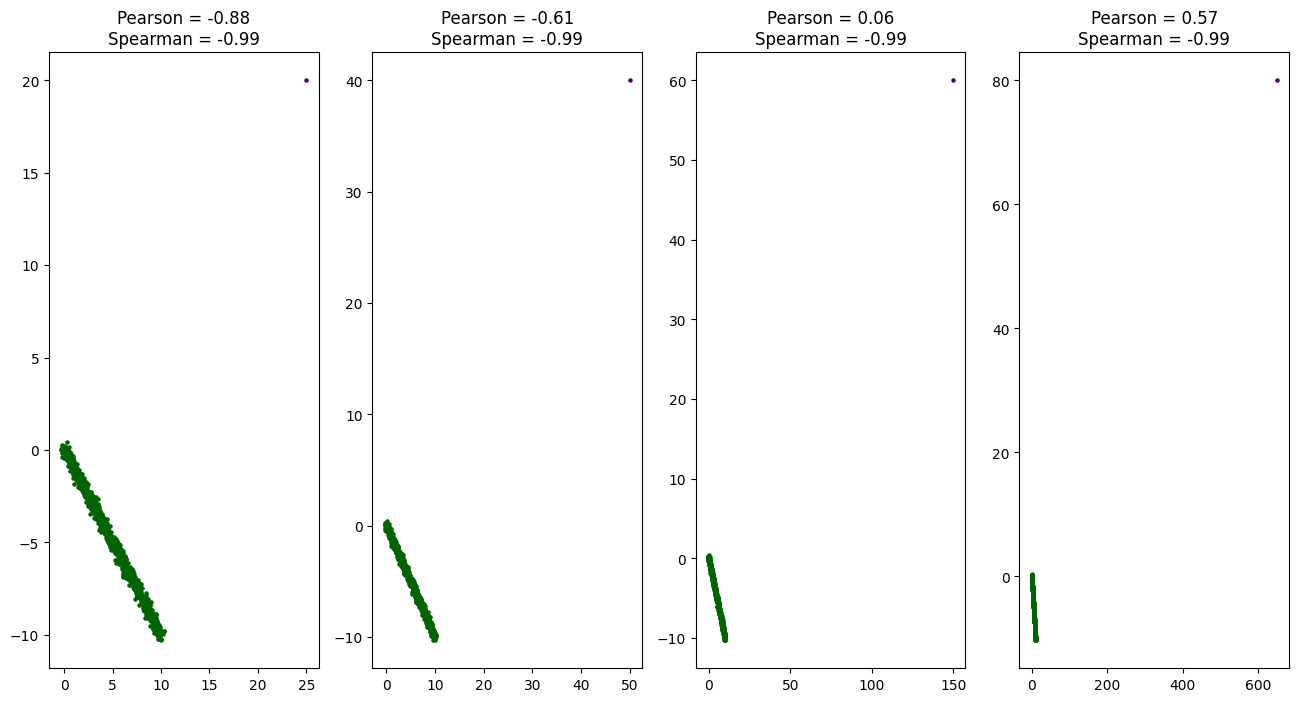

In [80]:
fig, axes = plt.subplots(1, 4, figsize=(16,8))

for i in range(4):
    x_=np.append(np.delete(x, indices), x[indices][i])
    y_=np.append(np.delete(y, indices), y[indices][i])

    corr_pearson, _ = pearsonr(x_, y_)
    corr_spearman, _ = spearmanr(x_, y_)

    axes[i].scatter(x[indices][i], y[indices][i], s=5, color="indigo")
    axes[i].scatter(np.delete(x, indices), np.delete(y, indices), s=5, color="#006400")
    axes[i].set_title('Pearson = {}\nSpearman = {}'.format(round(corr_pearson, 2), round(corr_spearman, 2)))